# Interactive data vizualisation

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper _The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis_.**[1]**

- 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor)
- Four features measured (the length and the width of the sepals and petals, in centimeters)

Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. 

<sub> **[1]** R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188. doi:10.1111/j.1469-1809.1936.tb02137.x.</sub>

Source [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

**We use this dataset to test different visualisation library :**  

- matplotlib
- pandas 
- seaborn
- ggplot with %%R
- plotly
- bokeh

__Install with conda__:

- from `conda-forge` channel install all python libraries:
```bash
conda install -c conda-forge matplotlib scikit-learn seaborn plotly bokeh nglview networkx vega
```
- from `r` channel install all r libraries:
```bash
conda install -c r rpy2 r-ggplot2 simplegeneric tzlocal
```

- to activate nglview widget extension (need a jupyter restart):
```bash
jupyter-nbextension enable nglview --py --sys-prefix
```


## Imports

In [1]:
# conda install -c conda-forge matplotlib scikit-learn seaborn plotly bokeh nglview networkx vega

from sklearn import datasets
import pandas as pd
import matplotlib
import qgrid


## Notebook customisation

In [2]:
# Change default size of plots
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data import

Import dataset from `sklearn.dataset`:

In [4]:
dataset = datasets.load_iris()

## Convert dataset to a pandas dataframe:

In [5]:
iris_pd = pd.DataFrame(dataset['data'], columns=['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width'])
iris_pd['Species'] = dataset['target']
iris_pd['Species'] = iris_pd['Species'].apply(lambda x: dataset['target_names'][x])

In [6]:
qgrid_widget = qgrid.show_grid(iris_pd, show_toolbar=True, grid_options={'maxVisibleRows':5})
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Basic matplotlib plot:

Two ways of representing the dataset:
- in the the first solution, we need to add a numerical column `color` to the dataframe, to color the points as function of species
- in the second solution, we need to plot each species individualy

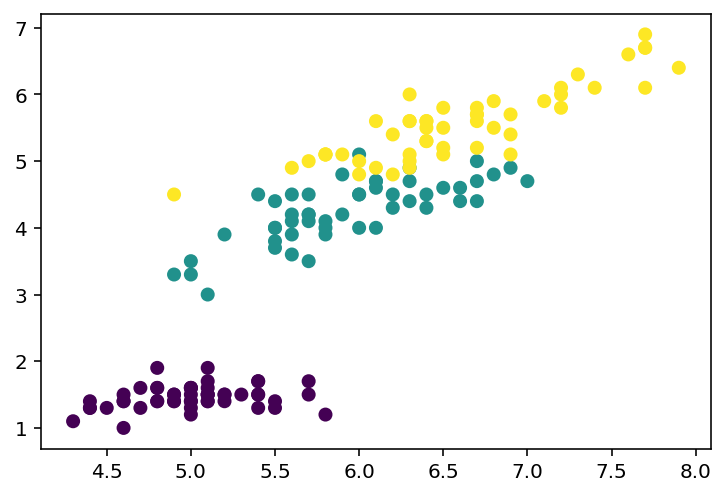

In [7]:
import matplotlib.pyplot as plt

# Need to add a column to color point as function of species:
color_dict = {'setosa':0, 'versicolor':1., 'virginica':2.}
iris_pd['color'] = iris_pd['Species'].apply(lambda x: color_dict[x])

plt.scatter(x=iris_pd['Petal Length'], y=iris_pd['Sepal Length'], c=iris_pd['color']);

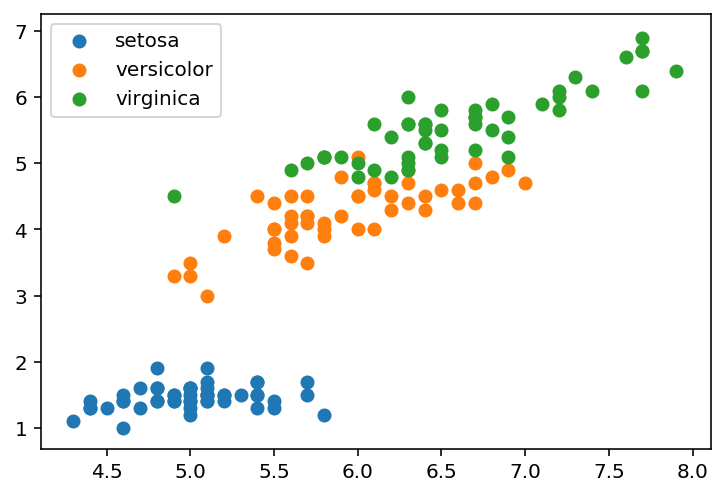

In [8]:
for name, group in iris_pd.groupby('Species'):
    plt.scatter(group['Petal Length'], group['Sepal Length'], label=name)
    
plt.legend();

## Pandas plot

You can use the function attached to the pandas DataFrame object to plot directly the data.

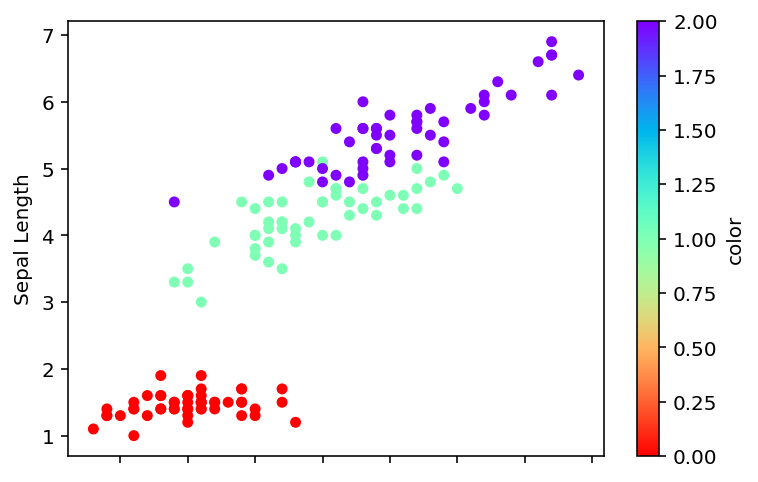

In [9]:
# Pandas plot
# Need numerical values as color
iris_pd.plot(kind='scatter', x='Petal Length', y='Sepal Length', c='color', colormap='rainbow_r');

## Seaborn 

_"Seaborn is a Python data visualization library based on **matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics."_

- Seaborn offers the same data abstraction as `ggplot`
- beautifull graphics
- matplotlib compatible



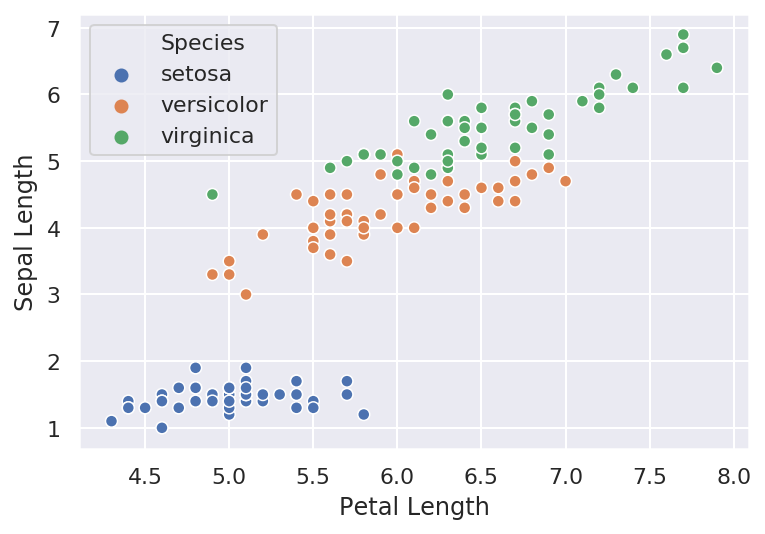

In [10]:
import seaborn as sns

sns.set()
sns.scatterplot(data=iris_pd, x='Petal Length', y='Sepal Length', hue='Species')

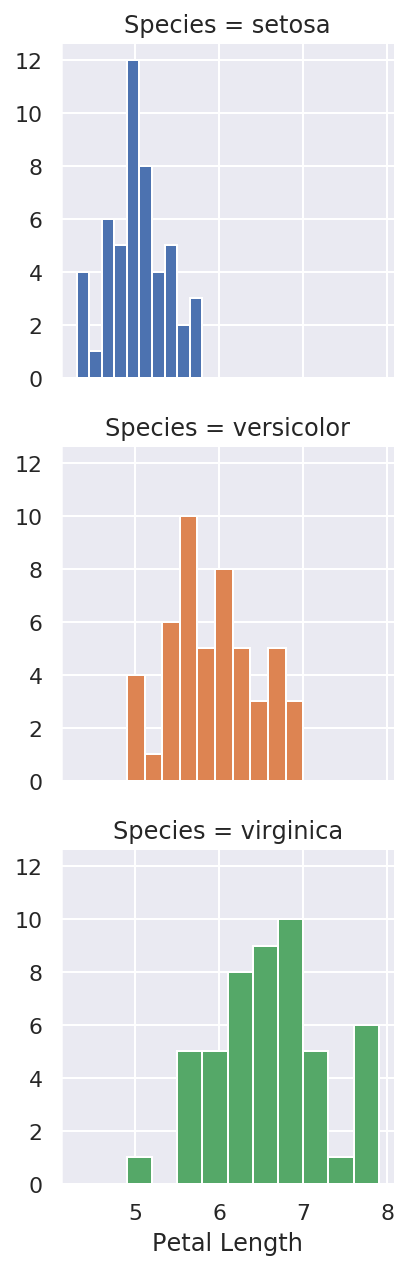

In [11]:
g = sns.FacetGrid(iris_pd, row="Species", hue="Species")
g = g.map(plt.hist, "Petal Length")

## Ggplot2 with R

Note that a _python_ version of ggplot exist but is not as complete as _R_ version.

In my opinion ggplot is the rolls royce of data vizualisation. It is extremly complete and highly customisable.

In [21]:
import rpy2.rinterface

# Load R magic command
%reload_ext rpy2.ipython

# we need to activate the automatic conversion for pandas
from rpy2.robjects import pandas2ri
pandas2ri.activate()

When you launch the R command you need to pass the `pandas` Dataframe as argument.

/home/murail/miniconda3/envs/jupyter_course/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



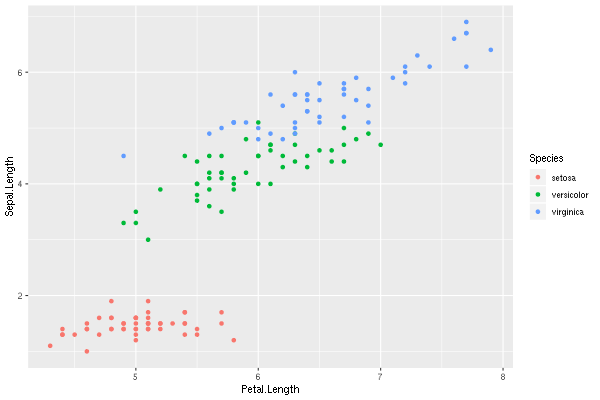

In [22]:
%%R -i iris_pd -w 600 -h 400 -u px

## Everything in here is ** R ** (magic)
# iris_pd is now an R dataframe

library("ggplot2")

classic <- ggplot(data=iris_pd) +
            geom_point(aes(x=Petal.Length, y=Sepal.Length, color=Species))

print(classic)


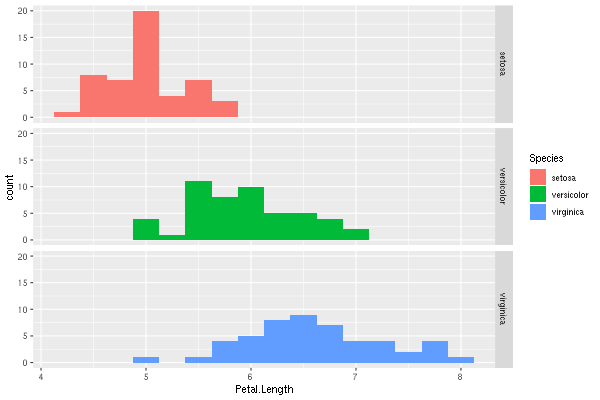

In [23]:
%%R -i iris_pd -w 600 -h 400 -u px

## Everything in here is ** R ** (magic)
# iris_pd is now an R dataframe

library("ggplot2")


distri <- ggplot(data=iris_pd)+
            geom_histogram(aes(Petal.Length, fill=Species), binwidth=0.25)+
            facet_grid(Species ~ .)
print(distri)

## [Plotly](https://plot.ly/python/)

_"Plotly's Python graphing library makes interactive, publication-quality graphs online"_

In [12]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Create a trace
trace = go.Scatter(
    x=iris_pd['Petal Length'], 
    y=iris_pd['Sepal Length'],
    mode = 'markers',
    marker=dict(color=iris_pd['color'],
                size=10,
                colorscale='Viridis',
                showscale=False))

layout = go.Layout(title='Training Points',
                   xaxis=dict(title='Petal Length',
                            showgrid=False),
                   yaxis=dict(title='Sepal Length',
                            showgrid=True))
 
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## [Bokeh](https://bokeh.pydata.org)

_"Bokeh is an interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of versatile graphics, and to extend this capability with high-performance interactivity over very large or streaming datasets."_

In [14]:
from bokeh.plotting import figure, show, output_file, output_notebook

color_dict = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [color_dict[x] for x in iris_pd['Species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Sepal Length'

p.circle(iris_pd["Petal Length"], iris_pd["Sepal Length"],
         color=colors, fill_alpha=0.9, size=10)

output_notebook()

show(p)



Loading BokehJS ...

## Vega

_"Vega is a visualization grammar, a declarative format for creating, saving, and sharing interactive visualization designs. With Vega you can describe data visualizations in a JSON format, and generate interactive views using either HTML5 Canvas or SVG."_

- Possibility to plot several graph connected:
    - change axis on all graphics
    - update selection on all graphics


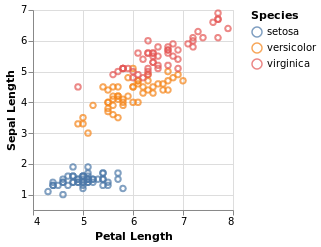

In [15]:
from vega import VegaLite

VegaLite({
  "mark": "point",
  "encoding": {
    "x": {"type": "quantitative",
          "field": "Petal Length",
          "scale": {"domain": [4, 8]}
    },
    "y": {"type": "quantitative",
          "field": "Sepal Length",
          "scale": {"domain": [0.9, 7]}
    },
    "color": {"type": "nominal",
              "field": "Species"},
  }
}, iris_pd)

## Networkx

_"NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks."_

/home/murail/miniconda3/envs/jupyter_course/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



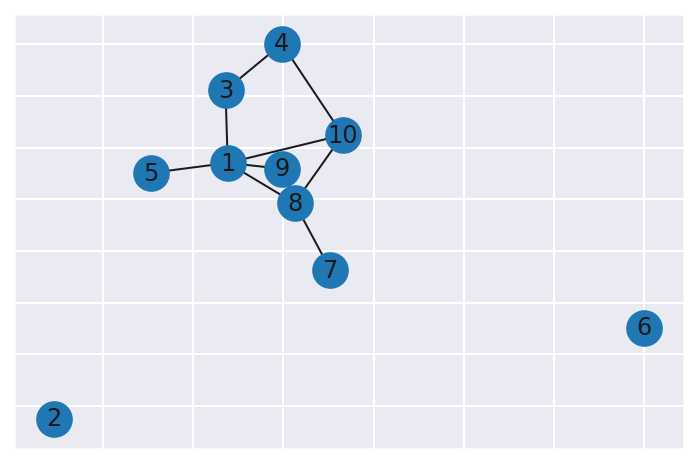

In [16]:
import networkx as nx
import random

node_num = 10
trans_g = nx.Graph()

for i in range(node_num):
    trans_g.add_node(i+1)
    
for i in range(node_num):
    for j in range(i, node_num):
        rand_float = random.random()
        if random.random() > 0.8:
            trans_g.add_edge(i+1, j+1, weight=rand_float)

nx.draw_networkx(trans_g)

## Nglview

In [3]:
import nglview
view = nglview.demo()  # load "3pqr" from RCSB PDB and display viewer widget

view


NGLWidget()